# Induced Fault Slip

## Background

In this assignment we will look at how pore pressure can induce slip on faults of various
orientations. We will perform a 2-D, simplified version of the analysis in a case study of hydraulic
fracturing-induced fault slip in the Sichuan Basin, China (Chen et al., 2018).
Utilize a scientific computing and/or plotting program such as MATLAB, Python or Excel to
follow the steps below. Then, answer the questions on the page below.

## Part 1: Pore pressure required to induce slip on faults

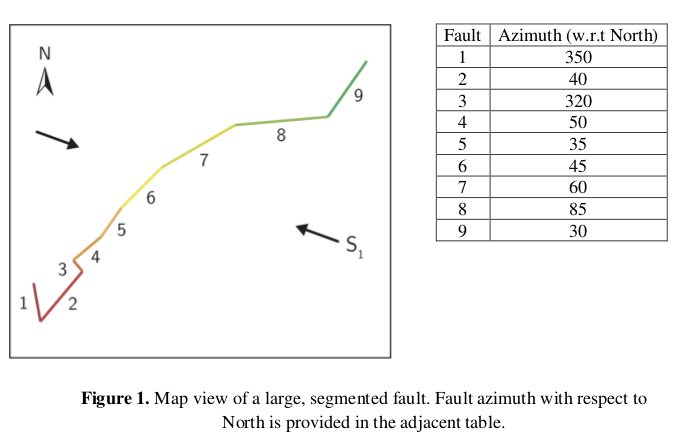

In [1]:
from IPython.display import Image
img = '/home/cdinneen/MOGE_and_Other_UniWork/Other_Online_Courses/Zoback_GeoMechanics_II/Assignments/06_Induced_fault_Slip/Figure1.png'
Image(filename=img)

As seen in Figure 8 in Chen et al. (2018), large faults in reservoirs are complex surfaces that can be discretized into segments in order to determine the probability of induced fault slip. Figure 1 above represents a simplified, 2-D version of the fault map in Figure 8c of Chen et al. Use the following information about the stress state to determine the pore pressure perturbation required to induce slip on each fault segment.


Assume a strike-slip faulting stress state. The maximum and minimum principal stresses are $S_1 = 50$ MPa, $S_3 = 26.5$ MPa. The azimuth of $S_1$ w.r.t North is 110°. The azimuth of the fault segments is provided in the table above. Note that these values represent the angular  difference measured clockwise from North. Pore pressure, $P_p = 15 MPa$. Assume a coefficient of sliding friction, $\mu = 0.6$.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
S1=50
S3=26.5
S1_Azim=110
Pp=15
mu=0.6
Fault_Azim=np.array([350,40,320,50,35,45,60,85,30])

### Calculate the resolved shear and effective normal stress on each fault segment by finding the angle (0-90°) between the fault normal direction and $S_1$ azimuth. See Unit 8 Section 1 for a review.

In [4]:
np.mod(Fault_Azim+90-S1_Azim,180)

array([150,  20, 120,  30,  15,  25,  40,  65,  10])

In [5]:
Fault_Norm_Azim=np.mod(Fault_Azim,180)+90
#np.mod(Fault_Azim-S_1_Azim,180)

In [6]:
Fault_Norm_Azim-S1_Azim

array([150,  20, 120,  30,  15,  25,  40,  65,  10])

In [7]:
phi=np.mod(Fault_Norm_Azim-S1_Azim,180)
phi[0]=180-phi[0]
phi[2]=180-phi[2]
phi

array([30, 20, 60, 30, 15, 25, 40, 65, 10])

In [8]:
sigma1=S1-Pp
sigma3=S3-Pp
tau_faults=0.5*(sigma1-sigma3)*np.sin(2*phi*np.pi/180)
n_faults=0.5*(sigma1+sigma3)+0.5*(sigma1-sigma3)*np.cos(2*phi*np.pi/180)
#tau_faults=np.abs(tau_faults)

In [9]:
Ratio_Stress1=tau_faults/n_faults

### Plot the principal stresses and frictional failure line on a 2-D Mohr diagram. Plot the resolved shear and effective normal stress on each fault segment. The points should all plot on the Mohr circle. Color the points by the value of the Coulomb Failure Function (CFF).

In [10]:
theta=np.arange(-91,1,1)

t13=-0.5*(sigma1-sigma3)*np.sin(2*theta*np.pi/180)
n13=0.5*(sigma1+sigma3)+0.5*(sigma1-sigma3)*np.cos(2*theta*np.pi/180)
sigma_n_MC=np.arange(np.max(n13))
tau_MC=0.6*sigma_n_MC

In [11]:
CFF_1=tau_faults-mu*n_faults
CFF_1

array([ -7.29920151, -11.79785891,  -0.24920151,  -7.29920151,
       -14.1804791 ,  -9.48063044,  -3.60272855,  -0.41732515,
       -16.55609629])

In [13]:
color = [str((item/np.min(CFF1))) for item in CFF1]

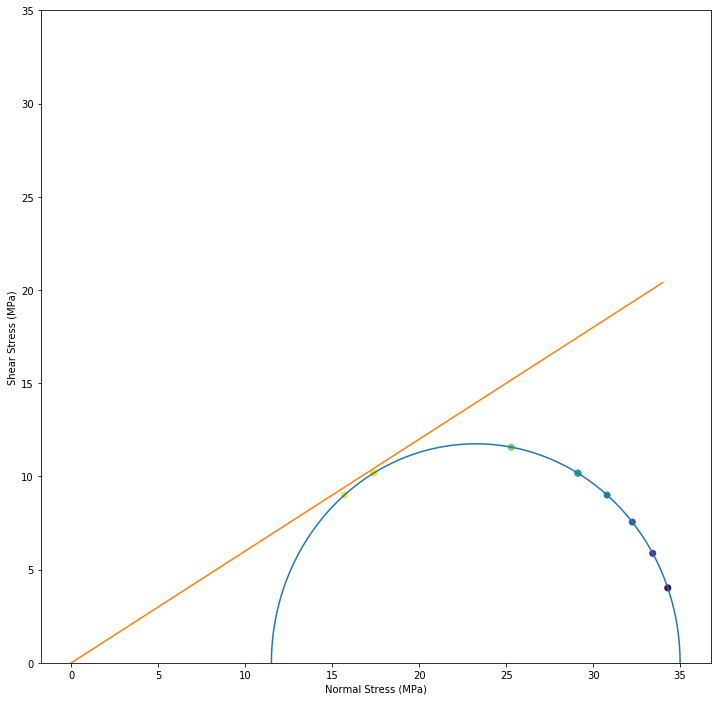

In [14]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,12)

# Mohr colomb circle
plt.plot(n13,t13)
# Frictional faulting limit
plt.plot(sigma_n_MC,tau_MC)
# Fault Points
plt.scatter(n_faults,tau_faults,c=CFF1)
plt.xlabel("Normal Stress (MPa)")
plt.ylabel("Shear Stress (MPa)")
plt.ylim(0,np.max(n13))
plt.show()

### Using the Coulomb failure criterion, determine the magnitude of the pore pressure perturbation required to induce slip on each fault segment.

In [15]:
from sympy import symbols, solve

In [16]:
X = symbols('X')
eqn=(0.5*((S1-X)-(S3-X))*np.sin(2*phi*np.pi/180)-mu*(0.5*((S1-X)+(S3-X))+0.5*((S1-X)-(S3-X))*np.cos(2*phi*np.pi/180)))
PpSoln=[solve(eqn[i],X) for i in np.arange(0,len(eqn))]
PpSoln=np.array(PpSoln)
ReqPp1=PpSoln-Pp

### Repeat steps (a-c) using an S 1 azimuth of 20°.

In [17]:
S1_Azim=20
phi=np.mod(Fault_Norm_Azim-S1_Azim,180)

In [18]:
phi

array([ 60, 110,  30, 120, 105, 115, 130, 155, 100])

In [19]:
theta=np.arange(0,180,1)
sigma1=S1-Pp
sigma3=S3-Pp
t13=-0.5*(sigma1-sigma3)*np.sin(2*theta*np.pi/180)
n13=0.5*(sigma1+sigma3)+0.5*(sigma1-sigma3)*np.cos(2*theta*np.pi/180)
sigma_n_MC=np.arange(np.max(n13))
tau_MC=0.6*sigma_n_MC

In [20]:
phi=np.where(phi>90,180-phi,phi)

In [21]:
tau_faults=0.5*(sigma1-sigma3)*np.sin(2*phi*np.pi/180)
n_faults=0.5*(sigma1+sigma3)+0.5*(sigma1-sigma3)*np.cos(2*phi*np.pi/180)

In [22]:
Ratio_Stress2=tau_faults/n_faults

In [23]:
mu=0.6*tau_faults/np.abs(tau_faults)

In [24]:
CFF2=mu/np.abs(mu)*(tau_faults-mu*n_faults)
CFF2

array([-0.24920151, -0.99663226, -7.29920151, -0.24920151, -1.9695209 ,
       -0.41732515, -1.15428925, -9.48063044, -3.30643034])

In [25]:
color = [str((item/np.min(CFF2))) for item in CFF2]

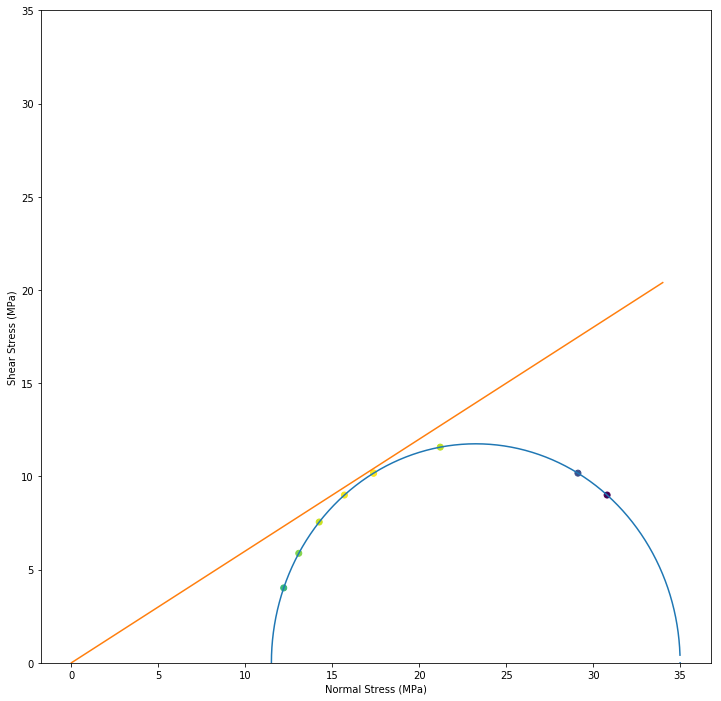

In [26]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,12)

# Mohr colomb circle
plt.plot(n13,t13)
# Frictional faulting limit
plt.plot(sigma_n_MC,tau_MC)
# Fault Points
plt.scatter(n_faults,tau_faults,c=CFF2)
plt.xlabel("Normal Stress (MPa)")
plt.ylabel("Shear Stress (MPa)")
plt.ylim(0,np.max(n13))
plt.show()

In [27]:
X = symbols('X')
eqn=(0.5*((S1-X)-(S3-X))*np.sin(2*phi*np.pi/180)-mu*(0.5*((S1-X)+(S3-X))+0.5*((S1-X)-(S3-X))*np.cos(2*phi*np.pi/180)))
PpSoln=[solve(eqn[i],X) for i in np.arange(0,len(eqn))]
PpSoln=np.array(PpSoln)
ReqPp2=PpSoln-Pp

## Part 2 Use the plots and calculations from Part 1 to answer the questions on the page below.

###  Question 1 

What is the ratio of resolved shear stress to effective normal stress on Fault 1?

In [28]:
Ratio_Stress1[1-1]

0.3493836392950096

What is the ratio of resolved shear stress to effective normal stress on Fault 3?

In [29]:
Ratio_Stress1[3-1]

0.585657467307462

What is the ratio of resolved shear stress to effective normal stress on Fault 9?

In [30]:
Ratio_Stress1[9-1]

0.11719375866600003

### Question 2 

Which fault is closest to failure?

In [31]:
np.argmax(CFF_1)+1

3

Which fault is furthest from failure?


In [32]:
np.argmin(CFF_1)+1

9

### Question 3 

What is the pore pressure perturbation required to induce slip on Fault 3 in MPa? Enter your answer without units.

In [33]:
ReqPp1[3-1]

array([0.415335842554750], dtype=object)

What is the pore pressure perturbation required to induce slip on Fault 7 in MPa? Enter your answer without units.

In [34]:
ReqPp1[7-1]

array([6.00454759109733], dtype=object)

### Question 4

Which faults are so mis-oriented that the pore pressure perturbation required to induce slip exceeds the range of allowable stress states? Choose all that apply.

In [35]:
ReqPp1>(S3-Pp)

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True]])

###  Question 5 

For an S1 azimuth of 20°, what is the ratio of resolved shear stress to effective normal stress on Fault 9?

In [36]:
Ratio_Stress2[9-1]

0.3291722909148418

For an S1 azimuth of 20°, what is the pore pressure perturbation required to induce slip on Fault 9 in MPa? Enter your answer without units.

In [37]:
ReqPp2[9-1]

array([5.51071723230450], dtype=object)

For an S1 azimuth of 20°, how many fault segments are so mis-oriented that the pore pressure perturbation required to induce slip exceeds the range of allowable stress states?

In [38]:
(np.where(ReqPp2>(S3-Pp),1,0)).sum()

2